## Problem 1: Suggesting Similar Papers

A citation network is a directed network where the vertices are academic papers and there is a directed edge from paper $A$ to paper $B$ if paper $A$ cites paper $B$ in its bibliography. Google Scholar performs automated citation indexing and has a useful feature that allows users to find similar papers. In the following, we analyze two approaches for measuring similarity between papers.

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Part (a): Co-citation Network

Two papers are said to be cocited if they are both cited by the same third paper. The edge weights in the cocitation network correspond to the number of cocitations. In this part, we will discover how to compute the (weighted) adjacency matrix of the cocitation network from the adjacency matrix of the citation network.

- Problem setup: In order to derive the cocitation matrix, we need to derive it as a function of the original adjacency matrix.

- Problem notation: If there is an edge from paper $i$ to paper $j$, it means that paper $i$ cites paper $j$. We will denote by $A$ the corresponding adjacency matrix, such that $A_{ij}=1$ means there is a directed edge from $i$ to $j$. Let us denote by $C$ the cocitation network matrix.

#### Question 1

Cocitation Matrix
[[2 1 0 1 1 2]
 [1 3 1 2 2 2]
 [0 1 2 1 2 1]
 [1 2 1 4 2 2]
 [1 2 2 2 4 2]
 [2 2 1 2 2 4]]


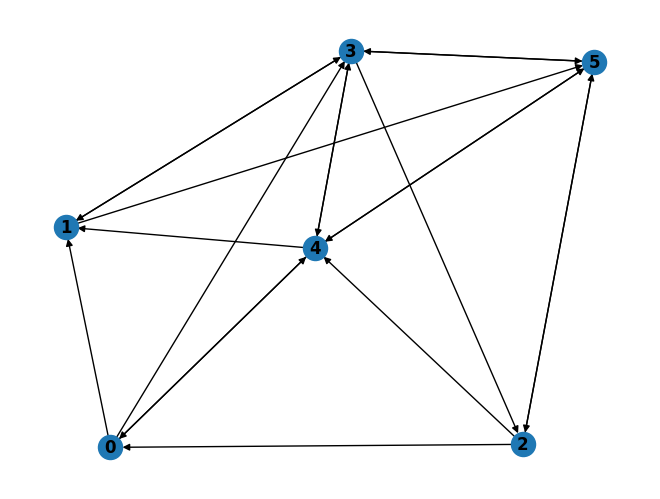

In [19]:
# Row indices: Paper in row i cites paper in column j
# Column indices: Paper in column j is cited

# Build a sample adjacency matrix
A = np.array([
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 1],
    [0, 0, 1, 1, 1, 0],
])

# Create a cocitation matrix (C) based on the following steps:
# - Construct an empty matrix for C
# - Fo each row "r" of A, if the row sum is strictly greater than 1, then 
#   do: for each pair ((r,a), (r,b)) in row "r" that are non-zero (meaning that there
#   is an existing relationship), add 1 to C at the location (a,b). Note that by
#   following this rule, you will naturally also add 1 to C at location (b,a) as the
#   pair ((r,b), (r,a)) must also be present
C = np.zeros_like(A)

# Go through each row of A
for r in range(A.shape[0]):

    # Check if the row sum is strictly greater than 1
    if np.sum(A[r,:]) > 1:

        # Go through each possible pair of columns
        for a in range(A.shape[1]):
            for b in range(A.shape[1]):

                # If the pair ((r,a), (r,b)) is non-zero, add 1 to C at location (a,b)
                if A[r,a] > 0 and A[r,b] > 0:
                    C[a,b] += 1 

# Print the estimated cocitation matrix
# The big O of this algorithm is O(n^3) since there are 3 nested for loops
print("Cocitation Matrix")
print(C)

# Create a directed graph from the adjacency matrix
G = nx.from_numpy_array(A, create_using=nx.DiGraph)
CM = nx.from_numpy_array(C, create_using=nx.DiGraph)

# Draw the graph with the weights of the Cocitation matrix as edge labels
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

#### Question 2

Write the cocitation weighted adjacency matrix, $C$, in terms of $A$ using matrix operations. Use A^T for $A^T$ and * for matrix multiplication. The diagonals in your answer need not match the diagonals generated by the definition in Question 1, the off-diagonals should match Question 1.

In [25]:
# Turn the algorithm from the previous step into a matrix operation
C_estimate = A.T @ A

# Print the cocitation matrices to see if they look similar
print("C_estimate: ")
print(C_estimate)
print("C:")
print(C)

# Check if the off-diagonal elements of C_estimate are equal to the 
# off-diagonal elements of C
print("C_estimate == C: ", np.allclose(C_estimate, C))

C_estimate: 
[[2 1 0 1 1 2]
 [1 3 1 2 2 2]
 [0 1 2 1 2 1]
 [1 2 1 4 2 2]
 [1 2 2 2 4 2]
 [2 2 1 2 2 4]]
C:
[[2 1 0 1 1 2]
 [1 3 1 2 2 2]
 [0 1 2 1 2 1]
 [1 2 1 4 2 2]
 [1 2 2 2 4 2]
 [2 2 1 2 2 4]]
C_estimate == C:  True


#### Part (b): Bibliographic Coupling

Two papers are said to be bibliographically coupled if they cite the same other papers. The edge weights in a bibliographic coupling correspond to the number of common citations between two papers.

How do you compute the (weighted) adjacency matrix of the bibliographic coupling, $B$, from the adjacency matrix of the citation network, $A$? Write your answer in terms of matrix operations.

In [26]:
# Compute the bibliographic coupling matrix B
# B apparently is the opposite of a cocitation matrix (with an edge weight symbolizing
# the number of times a paper shares a citation with another paper). This means that
# instead of doing A.T @ A, we do A @ A.T
B = A @ A.T
print("Bibliographic Coupling Matrix")
print(B)

Bibliographic Coupling Matrix
[[3 1 1 2 2 2]
 [1 2 1 1 2 1]
 [1 1 3 2 2 1]
 [2 1 2 4 2 2]
 [2 2 2 2 4 1]
 [2 1 1 2 1 3]]
